In [1]:
import tensorflow as tf

# 데이터셋으로 불러오기
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# 데이터 정규화 
training_images = training_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
model = tf.keras.models.Sequential([
                                                         
  # convolutions, pooling 사용 - 수학적인 과정은 따로 공부
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # FC layer add for classification 
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 input, output 출력 가능
model.summary()


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

이번 코드의 핵심은 convolution 과 pooling 과정을 직접 visualize 해보는 것이다 .

In [3]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 13, 13, 32) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 11, 11, 32) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 5, 5, 32) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTensor: shape=(None, 800) dtype=float32 (created by layer 'flatten')>, <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense')>, <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]
1/1 [==============================] - 0s 53ms/step
[array([[[[0.        , 0.01681377, 0.        , ..., 0.        ,
          0.        , 0.00106926],
         [0.        , 0.01681377, 0.        , ..., 0.        ,
          0.        , 0.00106926],
         [0.        , 0.01681377, 0.        , ..., 0.        ,
          0.        , 0.00106926],
         ...,
         [0.        , 0.01681377, 0.        , ..., 0.        ,

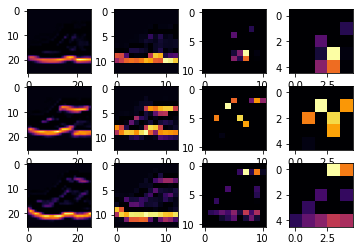

In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
print(layer_outputs)
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

print(activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1)))
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

실제로 위 코드에서 보면 training 과정에서 predict 시 이미지를 보여줬을 때의 과정이다.

tf.keras.model.Model은 multiple input, multiple output을 한번에 구현할 수 있게 해주는 코드다. 그래서 위에 코드처럼 output layers 만 추출하는 작업이 있고 input은 한 번만 들어가니까 그냥 선언할때 model.input으로 해도 무방하다. 
activation_model 에서 compile을 따로 선언하지 않았다. 그렇기에 predict의 output은 모든 convolution layer와 pooling layer의 결과값들들을 갖고 있다. 해당  layer를 거칠때마다 픽셀의 크기가 작아짐으로써 다시 그렇다는 것을 확인할 수 있다. 그렇다면 한 가지 궁금한 점은 fc layer는 ? 출력을 한다면 어떻게 할까?